In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

## KNN

In [2]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.25,
                                                   random_state=42)

In [3]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [4]:
knn_model

KNeighborsRegressor()

In [5]:
knn_model.n_neighbors

5

## Tahmin

In [9]:
y_pred = knn_model.predict(X_test)

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred))  #test hatası

426.6570764525201

In [6]:
RMSE = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print("k =", k, "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [13]:
#GridSearchCV metoduyla optimum k saysını belirleyeceğiz

In [4]:
from sklearn.model_selection import GridSearchCV

In [16]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [17]:
knn = KNeighborsRegressor()

In [18]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)

In [19]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [20]:
knn_cv_model.best_params_["n_neighbors"] #en uygun parametre değeri

8

In [13]:
RMSE = []
RMSE_CV = []

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10,
                                        scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k =", k, "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv)

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


In [21]:
#final modeli

In [22]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [23]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [24]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

## SVR (Destek Vektör Regresyonu)

In [17]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.25,
                                                   random_state=42)

In [11]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [12]:
from sklearn.svm import SVR

In [13]:
svr_model = SVR("linear").fit(X_train, y_train)

In [14]:
svr_model.predict(X_train)[0:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [15]:
#svr'ın model denklemi aşağıdaki gibidir

In [16]:
print("y = {0} + {1} x".format(svr_model.intercept_[0],
                              svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [17]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [18]:
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [19]:
y_pred = svr_model.predict(X_train)

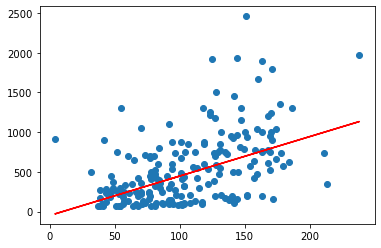

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color ="r")

In [21]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334572 + 5.1724561354706875 x


In [22]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş(Salary)')

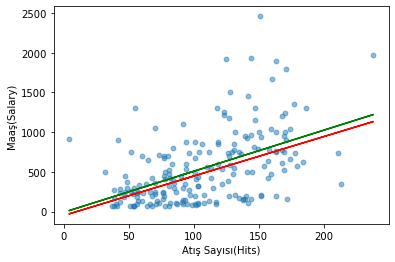

In [23]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)")

In [68]:
#linear model daha yukarıda tahmin vermişti. O yüzden yeşil olan linear kırmızı olan svr'dır

## Tahmin

In [31]:
print("y = {0} + {1} x".format(svr_model.intercept_[0],
                              svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [32]:
svr_model.predict([[91]])

array([403.52804878])

In [33]:
y_pred = svr_model.predict(X_test)

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [35]:
svr_model

SVR(kernel='linear')

## Model Tuning

In [24]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train, y_train)

In [25]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [38]:
#final modelimizi oluşturalım

In [39]:
svr_tuned = SVR("linear",
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [40]:
y_pred = svr_tuned.predict(X_test)

In [41]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [50]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

## Doğrusal Olmayan SVR

In [26]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [27]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

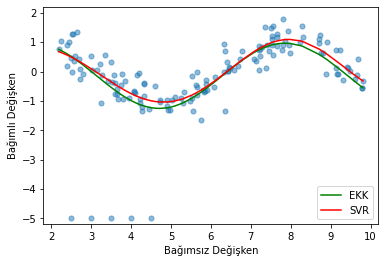

In [28]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4)

In [10]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.25,
                                                   random_state=42)

In [46]:
svr_rbf = SVR("rbf").fit(X_train, y_train)

## Tahmin

In [47]:
y_pred = svr_rbf.predict(X_test)

In [48]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Model Tuning

In [49]:
svr_params = {"C": [0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [50]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [60]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [61]:
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

## Yapay Sinir Ağları

## Çok Katmanlı Algılayıcı

In [29]:
import pandas as pd

In [12]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.25,
                                                   random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [48]:
X_train_scaled = scaler.transform(X_train)

In [49]:
X_test_scaled = scaler.transform(X_test)

In [31]:
from sklearn.neural_network import MLPRegressor

In [51]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [52]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [82]:
mlp_model.n_layers_  # katman sayısı

4

In [80]:
mlp_model.hidden_layer_sizes #gizli katman sayısı

(100, 20)

### Tahmin

In [84]:
mlp_model.predict(X_train_scaled)[0:5]

array([ 77.21648928, 374.06051879, 253.99415017,  54.07991102,
        51.06248493])

In [85]:
#şimdi test hatamızı hesaplayalım

In [86]:
y_pred = mlp_model.predict(X_test_scaled)

In [87]:
np.sqrt(mean_squared_error(y_test, y_pred))

459.6546128468002

## Model Tuning

In [88]:
# yapay sinir ağı modeli kurmak istediğimizde gizli katman sayısını ifade etmenin yolu
# 'hidden_layer_sizes' argümanına katmanların eleman sayısını girmektir.

In [89]:
mlp_params = {'alpha': [0.1, 0.01, 0.02, 0.005],
             'hidden_layer_sizes': [(20,20), (100,50,150), (300,200,150)],
             'activation': ['relu', 'logistic']}

In [94]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [95]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [96]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [97]:
mlp_tuned = MLPRegressor(alpha = 0.01, hidden_layer_sizes = (100, 50, 150))

In [98]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.01, hidden_layer_sizes=(100, 50, 150))

In [99]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [100]:
np.sqrt(mean_squared_error(y_test, y_pred))

358.7004858415965

## CART

In [186]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.25,
                                                   random_state=42)

In [102]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [112]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [113]:
cart_model

DecisionTreeRegressor(max_leaf_nodes=10)

In [114]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

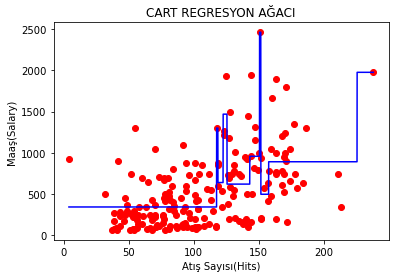

In [115]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_grid, cart_model.predict(X_grid), color = "blue")
plt.title('CART REGRESYON AĞACI')
plt.xlabel('Atış Sayısı(Hits)')
plt.ylabel('Maaş(Salary)') ;

In [116]:
#yukarıdaki grafik eksen üzerindeki gösterimiydi. Ağaç yapısı olarak görmek istersek eğer yani kural setini vermek istersek ;

 şirketin bizden kural seti istediğini düşünelim 
ama bu kural seti python derlenmesi anlamında pythona uyarlı bir kural seti olsun ki
 bazı argümanları girdiğimizde tahmin değeri üretsin denmiş olduğunda şunları yapıyoruz

In [124]:
!pip install astor

In [118]:
!pip install skompiler

  Created wheel for skompiler: filename=SKompiler-0.6-py3-none-any.whl size=54265 sha256=6eb8016892089e9c0267893e8d3f1ab970f76da7e5ebb5ae8beebcfc30d73fd4
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\2c\b1\69\4b5b50d4d429c350df3e1d2e8b35fdf5584448738d6cd3f540
Successfully built skompiler


In [32]:
from skompiler import skompile

In [120]:
#şimdi kural setini oluşturacağız

In [126]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



In [128]:
#yukarıdaki karar ağacının karar modelidir

## Tahmin

In [129]:
x = [91]

In [130]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [134]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [132]:
cart_model.predict([[91]])

array([345.20115517])

In [135]:
y_pred = cart_model.predict(X_test)

In [136]:
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

## Model Tuning

In [199]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [200]:
np.sqrt(mean_squared_error(y_test, y_pred))

483.9689910316695

In [193]:
cart_params = {"min_samples_split": range(2,100),
          "max_leaf_nodes": range(2,10)}

In [191]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [192]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [194]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [195]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [196]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [197]:
y_pred = cart_tuned.predict(X_test)

In [198]:
np.sqrt(mean_squared_error(y_test, y_pred))

376.39788207109865

## Bagged Trees Regresyon

In [2]:
import pandas as pd

In [54]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.25,
                                                   random_state=42)

In [55]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [57]:
bag_model.n_estimators #n_estimators kaç tane ağaç oluşturulacağını gösterir

10

In [58]:
bag_model.estimators_

[DecisionTreeRegressor(random_state=931364903),
 DecisionTreeRegressor(random_state=944211666),
 DecisionTreeRegressor(random_state=1603573788),
 DecisionTreeRegressor(random_state=1246597820),
 DecisionTreeRegressor(random_state=732231566),
 DecisionTreeRegressor(random_state=2009097803),
 DecisionTreeRegressor(random_state=483123232),
 DecisionTreeRegressor(random_state=1544029129),
 DecisionTreeRegressor(random_state=1703875551),
 DecisionTreeRegressor(random_state=1731910844)]

In [60]:
#her bir ağaçta örneğin kaç tane örnek olduğu bilgisine erişmek istiyorsak;

In [62]:
bag_model.estimators_samples_

[array([ 42, 183,  77,  88, 131,  41,  58, 109, 135,  18, 106, 147, 113,
         26,  12, 170,  90,  75,  89,  61, 172,  11, 147, 158,  74,  93,
        154,   5, 184, 195, 156, 177,  73,  42, 123,  99, 103,  54, 163,
         16,  36,  75,  20,  42, 118,  21, 190,  84,   4, 151,  30, 185,
         17, 196,  83,  72,  90,  99, 105,  24, 118,  57,  32, 110, 124,
         87, 167,  88,  94, 193, 137,  48, 149,  24,  75, 145, 185,  76,
        166, 177,   1,   7,  53, 181,  32,   3,  89, 135, 158, 120, 134,
         16, 106, 161, 159, 146,  59,  28,  78,   8,   3, 168,  34,  66,
         65, 105, 136, 134,  26,  10, 163, 168, 136, 107,  99, 168, 119,
          8,  59, 196, 111,  58,   8,  56, 179,  57,  83, 101,  73,   6,
        190, 131,   2,   5,  23, 135,  61,  77,   6, 173,  99,  71,  85,
        123,  26,   1, 128,  10, 182,  81, 195,  57,  87, 113, 155, 115,
        163, 160, 135, 128, 104, 194, 169,  94, 175,  66, 159, 106, 116,
        118,  73, 150,   6, 178, 146, 102,  57, 120

In [63]:
#her bir ağacın bağımsız değişkenlerine ulaşmak istersek

In [64]:
bag_model.estimators_features_

[array([ 7,  3,  0,  6, 14, 10,  6, 10,  0,  1,  3,  3,  6, 17,  5, 14,  5,
         9,  7]),
 array([18, 11, 10, 18,  4,  3, 10,  4, 12,  1,  2,  4,  4, 14,  7,  1, 14,
        17, 16]),
 array([13, 17, 15,  9,  8, 16,  7, 15,  3,  1, 11,  5,  2, 13,  6,  4, 13,
        16,  4]),
 array([ 3,  4, 10, 11, 11, 11, 14,  1,  7,  6, 12, 18,  5, 13, 18, 10,  6,
         9, 16]),
 array([14,  2, 14,  9,  7,  1,  7,  7,  5, 15, 18, 11, 16,  3, 16, 12, 11,
         4,  4]),
 array([11,  9, 17, 15,  2, 12, 11,  6,  7,  3,  0,  2, 15, 10,  8,  8, 10,
         3, 12]),
 array([ 0, 12,  6,  1, 15,  6,  0, 16, 13,  0, 11,  2,  2,  9,  3, 10,  3,
        14, 18]),
 array([ 9,  8,  3,  2,  5,  8, 16, 13,  2,  7, 18, 13, 13, 14, 10, 13, 16,
        18,  8]),
 array([ 9, 14,  2,  5, 16,  4,  2, 10,  4,  0,  4, 13, 11, 16,  1,  3, 14,
         1, 11]),
 array([ 7,  6,  1, 16, 11, 11,  4, 18, 16, 18,  9, 17,  9,  1,  0, 13, 17,
        13,  9])]

In [65]:
#incelememizi ilerletip her bir modele özel değerlere ulaşmaya çalışalım

In [67]:
bag_model.estimators_[1]

DecisionTreeRegressor(random_state=944211666)

## Tahmin

In [68]:
y_pred = bag_model.predict(X_test)

In [69]:
np.sqrt(mean_squared_error(y_test, y_pred))

348.4154548364795

In [72]:
#şimdi her bir ağaca gidip fikrini almayı deneyelim
#örneğin ikinci ağaca gidelim

In [73]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [74]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

513.9699275099575

In [75]:
yedi_y_pred = bag_model.estimators_[6].fit(X_train, y_train).predict(X_test)

In [76]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

473.5090613543385

## Model Tuning

In [77]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [78]:
bag_params = {'n_estimators': range(2,20)}

In [80]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [82]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [83]:
bag_cv_model.best_params_

{'n_estimators': 15}

In [84]:
# bunun üzerinden final modelimizi olusturalım

In [86]:
bag_tuned = BaggingRegressor(n_estimators = 15, random_state = 45)

In [87]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=15, random_state=45)

In [88]:
y_pred = bag_tuned.predict(X_test)

In [90]:
np.sqrt(mean_squared_error(y_test, y_pred))

342.0826200646889

## Random Forests

In [91]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.25,
                                                   random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
rf_model = RandomForestRegressor(random_state = 42)

In [94]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [100]:
# Random forests'ta önemli olan 2 parametre var.
# fit edilecek ağaç sayısı ve bölünmelerde kullanılacak olan değişken sayısı

## Tahmin

In [97]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [98]:
y_pred = rf_model.predict(X_test)

In [99]:
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

## Model Tuning

In [103]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators': [100, 200, 500, 1000, 2000]}

In [105]:
rf_model = RandomForestRegressor(random_state = 42)

In [106]:
rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv = 10,
                          n_jobs = -1)

In [107]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [108]:
rf_cv_model.best_params_

{'max_depth': 8, 'max_features': 3, 'n_estimators': 200}

In [111]:
rf_tuned = RandomForestRegressor(max_depth = 8,
                                 max_features = 3,
                                 n_estimators = 200)

In [112]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [113]:
y_pred = rf_tuned.predict(X_test)

In [114]:
np.sqrt(mean_squared_error(y_test, y_pred))

342.4952531862

In [115]:
#değişkenlerin önem düzeylerine erişmek istersek

In [116]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

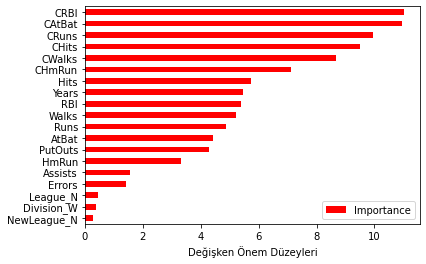

In [117]:
Importance.sort_values(by = "Importance",
                       axis = 0, ascending = True).plot(kind="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## Gradient Boosting Machines

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Tahmin

In [57]:
y_pred = gbm_model.predict(X_test)

In [58]:
np.sqrt(mean_squared_error(y_test, y_pred))

348.52194271402385

## Model Tuning

In [59]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8, 50, 100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1, 0.5, 0.75]
}

In [60]:
#verbose: iterasyonları gözlemlemeyle ilgilidir.

In [62]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [63]:
gbm_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.75}

In [68]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,
                                     max_depth = 3,
                                     n_estimators = 1000,
                                     subsample = 0.75)

gbm_tuned = gbm_tuned.fit(X_train, y_train)

In [71]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

349.2049136280873

In [70]:
#değişken önem düzeyi kısmına geçelim

In [72]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

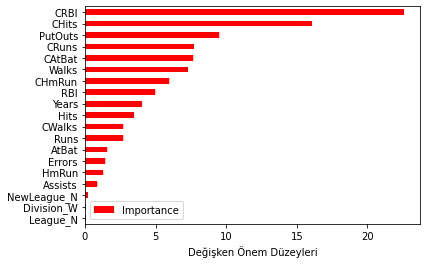

In [73]:
Importance.sort_values(by = "Importance",
                       axis = 0, ascending = True).plot(kind="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## XGBoost

In [13]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.25,
                                                   random_state=42)

In [14]:
!pip install xgboost

In [35]:
import xgboost as xgb

In [16]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [36]:
from xgboost import XGBRegressor

In [19]:
xgb_model = XGBRegressor().fit(X_train, y_train)

## Tahmin

In [21]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

355.46515176059927

In [22]:
# Model Tuning

In [23]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [24]:
#colsample_bytree: ağaç başına değişkenlerden alınacak olan örnek oranı
#learning_rate: overfittingi engellemek için kullanılır 0 ile 1 arasında değer almasını bekleriz

In [25]:
xgb_grid = {
    'colsample_bytree': [0.4, 0.5, 0.6,0.9,1],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [2,3,4,5,6],
    'learning_rate': [0.1, 0.01, 0.05]
}

In [27]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb,
                      param_grid = xgb_grid,
                      cv = 10,
                      n_jobs = -1,
                      verbose = 2)

xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
      

In [28]:
xgb_cv.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 500}

In [29]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.5,
                        learning_rate = 0.1,
                        max_depth = 2,
                        n_estimators = 500)

xgb_tuned = xgb_tuned.fit(X_train, y_train) 

In [30]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

346.0275204366939

## Light GBM 

In [37]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.25,
                                                   random_state=42)

In [38]:
!pip install lightgbm

In [40]:
from lightgbm import LGBMRegressor

In [41]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

## Tahmin

In [43]:
y_pred = lgbm_model.predict(X_test, num_iteration = lgbm_model.best_iteration_)

In [44]:
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

## Model Tuning

In [45]:
lgbm_model

LGBMRegressor()

In [48]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_estimators': [20, 40, 100, 200, 500, 1000],
    'max_depth': [1,2,3,4,5,6,7,8]
}

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs=-1, verbose = 2)

In [49]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits


GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [50]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 20}

In [51]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1,
                          max_depth = 6,
                          n_estimators = 20,
                          colsample_bytree = 0.5)
lgbm_tuned = lgbm_tuned.fit(X_train, y_train)

In [52]:
y_pred = lgbm_tuned.predict(X_test)

In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

375.6085209015434

## CatBoost

In [54]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis = 1).astype("float")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                   test_size=0.25,
                                                   random_state=42)

In [55]:
!pip install catboost

In [56]:
from catboost import CatBoostRegressor

In [57]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 145ms	remaining: 2m 24s
1:	learn: 431.3923642	total: 148ms	remaining: 1m 13s
2:	learn: 424.8820360	total: 150ms	remaining: 50s
3:	learn: 418.2514904	total: 153ms	remaining: 38.1s
4:	learn: 412.6394021	total: 156ms	remaining: 31s
5:	learn: 406.6247020	total: 158ms	remaining: 26.2s
6:	learn: 400.5321206	total: 161ms	remaining: 22.8s
7:	learn: 394.6683437	total: 163ms	remaining: 20.3s
8:	learn: 388.2496484	total: 166ms	remaining: 18.2s
9:	learn: 382.9448842	total: 171ms	remaining: 16.9s
10:	learn: 377.2600080	total: 174ms	remaining: 15.6s
11:	learn: 372.4829606	total: 179ms	remaining: 14.7s
12:	learn: 366.6823437	total: 182ms	remaining: 13.8s
13:	learn: 362.6076230	total: 185ms	remaining: 13s
14:	learn: 358.0107745	total: 188ms	remaining: 12.4s
15:	learn: 353.2802665	total: 192ms	remaining: 11.8s
16:	learn: 348.5646265	total: 197ms	remaining: 11.4s
17:	learn: 343.6407912	total: 201ms	remaining: 11s
18:	learn: 339.2363847	total: 20

## Tahmin

In [58]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

## Model Tuning

In [62]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8]
}

In [63]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv = 5, n_jobs = -1, verbose = 2)

In [64]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 422.4143448	total: 2.39ms	remaining: 2.39s
1:	learn: 404.1864276	total: 4.06ms	remaining: 2.03s
2:	learn: 386.3231718	total: 5.6ms	remaining: 1.86s
3:	learn: 370.5548032	total: 7.16ms	remaining: 1.78s
4:	learn: 354.9242038	total: 9.06ms	remaining: 1.8s
5:	learn: 342.3403984	total: 10.6ms	remaining: 1.76s
6:	learn: 328.2370070	total: 12.2ms	remaining: 1.73s
7:	learn: 317.5056526	total: 13.7ms	remaining: 1.7s
8:	learn: 306.6243511	total: 15.3ms	remaining: 1.68s
9:	learn: 297.3147023	total: 16.9ms	remaining: 1.67s
10:	learn: 288.3685892	total: 18.4ms	remaining: 1.66s
11:	learn: 281.0996220	total: 19.9ms	remaining: 1.64s
12:	learn: 273.2254898	total: 21.4ms	remaining: 1.63s
13:	learn: 266.9003385	total: 23.2ms	remaining: 1.63s
14:	learn: 261.9092500	total: 25.1ms	remaining: 1.65s
15:	learn: 256.2637350	total: 26.7ms	remaining: 1.64s
16:	learn: 250.3667935	total: 28.3ms	remaining: 1.63s
17:	learn: 244.8631098	total: 29.

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x000002B78B024DC0>,
             n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             verbose=2)

In [65]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [66]:
catb_tuned = CatBoostRegressor(iterations = 1000,
                              learning_rate = 0.01,
                              depth = 5)

catb_tuned = catb_tuned.fit(X_train, y_train)

0:	learn: 442.5792318	total: 3.88ms	remaining: 3.87s
1:	learn: 440.6665518	total: 5.45ms	remaining: 2.72s
2:	learn: 438.6627473	total: 6.85ms	remaining: 2.28s
3:	learn: 436.4681218	total: 8.25ms	remaining: 2.05s
4:	learn: 434.1332167	total: 9.92ms	remaining: 1.97s
5:	learn: 431.8037377	total: 11.3ms	remaining: 1.88s
6:	learn: 429.5841255	total: 12.7ms	remaining: 1.8s
7:	learn: 427.4460012	total: 14.1ms	remaining: 1.75s
8:	learn: 425.4173128	total: 15.9ms	remaining: 1.75s
9:	learn: 423.3683460	total: 17.6ms	remaining: 1.75s
10:	learn: 421.3877493	total: 19.2ms	remaining: 1.73s
11:	learn: 419.3313943	total: 21.2ms	remaining: 1.75s
12:	learn: 417.2951446	total: 22.8ms	remaining: 1.73s
13:	learn: 415.5565286	total: 24.7ms	remaining: 1.74s
14:	learn: 413.8714220	total: 26.3ms	remaining: 1.72s
15:	learn: 412.0658193	total: 27.6ms	remaining: 1.7s
16:	learn: 410.2187306	total: 28.9ms	remaining: 1.67s
17:	learn: 408.1825387	total: 30.5ms	remaining: 1.67s
18:	learn: 406.3219325	total: 31.9ms	rem

In [67]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.139653168496